# import library

In [2]:
# dor dataframe
import pandas as pd

# import information aboyt mysql
import json
from sqlalchemy import create_engine
from urllib.parse import quote_plus

#for outlier
import numpy as np
# for standard data
from sklearn.preprocessing import StandardScaler
# for encode data
from sklearn.preprocessing import LabelEncoder

# for create category
from sklearn.cluster import KMeans

# for visioulation
import seaborn as sns
import matplotlib.pyplot as plt

# set option

In [3]:
pd.set_option('display.max_columns', None)

# import dataset

In [4]:
with open('config.json') as f:
    config = json.load(f)

db_config = config['database']
username = db_config['user']
password = db_config['password']
host = db_config['host']
database = db_config['name']
password_encoded = quote_plus(password)

In [5]:
engine = create_engine(f"mysql+pymysql://{username}:{password_encoded}@{host}/{database}")

# read sql file
df_super_store = pd.read_sql("SELECT * FROM Superstore", con=engine)


# check dataset

In [6]:
df_super_store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df_super_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# renaming column 

In [8]:
df_super_store.rename(columns={
    "Order ID" : "Order_ID",
    "Order Date" : "Order_Date",
    "Ship Date" : "Ship_Date",
    "Ship Mode" : "Ship_Mode",
    "Customer ID" : "Customer_ID",
    "Postal Code" : "Postal_Code",
    "Product ID" : "Product_ID",
    "Sub-Category" : "Sub_Category",
    "Product Name" : "Product_Name",
},inplace=True)

# remove additional column

In [9]:
columns_to_drop = [
    'Row ID',        
    'Customer_Name',    
    'Country'         
]
df_super_store = df_super_store.drop(columns=columns_to_drop, errors='ignore')

del columns_to_drop

# check null value

In [10]:
# sum of the null value in every column
print(df_super_store.isnull().sum())

Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer Name    0
Segment          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


# data type

In [11]:
df_super_store.dtypes

Order_ID          object
Order_Date        object
Ship_Date         object
Ship_Mode         object
Customer_ID       object
Customer Name     object
Segment           object
City              object
State             object
Postal_Code        int64
Region            object
Product_ID        object
Category          object
Sub_Category      object
Product_Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [12]:
# convert to data type
df_super_store["Order_ID"] = df_super_store["Order_ID"].str.split("-").str[-1]
df_super_store["Order_ID"] = df_super_store["Order_ID"].astype("int")

# convert to data time
df_super_store["Order_Date"] = pd.to_datetime(df_super_store["Order_Date"])
# additional column in dataframe
df_super_store['Order_Year'] = df_super_store['Order_Date'].dt.year
df_super_store['Order_Month'] = df_super_store['Order_Date'].dt.month

# convert to data time
df_super_store["Ship_Date"] = pd.to_datetime(df_super_store["Ship_Date"])
# additional column in dataframe
df_super_store['Ship_Year'] = df_super_store['Ship_Date'].dt.year
df_super_store['Ship_Month'] = df_super_store['Ship_Date'].dt.month

In [13]:
df_super_store.dtypes

Order_ID                  int32
Order_Date       datetime64[ns]
Ship_Date        datetime64[ns]
Ship_Mode                object
Customer_ID              object
Customer Name            object
Segment                  object
City                     object
State                    object
Postal_Code               int64
Region                   object
Product_ID               object
Category                 object
Sub_Category             object
Product_Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Order_Year                int32
Order_Month               int32
Ship_Year                 int32
Ship_Month                int32
dtype: object

# drop duplicate

In [14]:
df_super_store.drop_duplicates()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer Name,Segment,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Order_Year,Order_Month,Ship_Year,Ship_Month
0,152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,2016,11
1,152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,2016,11
2,138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,2016,6
3,108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,2015,10
4,108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,2015,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014,1,2014,1
9990,121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017,2,2017,3
9991,121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2017,2,2017,3
9992,121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2017,2,2017,3


# Normalize

In [15]:
numeric_cols = ['Sales', 'Profit', 'Discount']

# normalize 
scaler = StandardScaler()
scaled  = scaler.fit_transform(df_super_store[numeric_cols])

#create a dataframe becouse doesnt remove data
scaled_df = pd.DataFrame(scaled, columns=['Sales_scaled', 'Profit_scaled','Discount_scaled'])


#add to orginal dataframe
df_super_store = pd.concat([df_super_store, scaled_df], axis=1)

#delete additional data
del scaled_df , scaled ,scaler

In [16]:
outliers = (np.abs(df_super_store[['Sales_scaled', 'Profit_scaled', 'Discount_scaled']]) > 3).any(axis=1)

df_super_store = df_super_store[outliers].copy()

del outliers

In [17]:
df_super_store.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer Name,Segment,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Order_Year,Order_Month,Ship_Year,Ship_Month,Sales_scaled,Profit_scaled,Discount_scaled
14,118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5,0.8,-123.8580,2015,11,2015,11,-0.258415,-0.651082,3.118544
15,118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544,3,0.8,-3.8160,2015,11,2015,11,-0.364745,-0.138626,3.118544
27,150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,Philadelphia,Pennsylvania,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522,2015,9,2015,9,4.578800,-7.230398,1.665349
75,118038,2017-12-09,2017-12-11,First Class,KB-16600,Ken Brennan,Corporate,Houston,Texas,77041,Central,OFF-BI-10004182,Office Supplies,Binders,Economy Binders,1.248,3,0.8,-1.9344,2017,12,2017,12,-0.366824,-0.130593,3.118544
101,158568,2016-08-29,2016-09-02,Standard Class,RB-19465,Rick Bensley,Home Office,Chicago,Illinois,60610,Central,OFF-BI-10002609,Office Supplies,Binders,Avery Hidden Tab Dividers for Binding Systems,1.788,3,0.8,-3.0396,2016,8,2016,9,-0.365958,-0.135311,3.118544


# bin

In [18]:
print(df_super_store.describe())

bins = [0,50,100,150,200,250,300,350,400,450,500,3000]
labels = ["0_50","51_100","101_150","151_200","201_250","251_300","301_350","351_400","401_450","451_500","501_3000"]

df_super_store["Sales_Range"] = pd.cut(df_super_store["Sales"], labels=labels, bins=bins)

print(df_super_store.head())

            Order_ID                     Order_Date  \
count     455.000000                            455   
mean   133897.984615  2016-04-20 16:55:54.725274624   
min    100111.000000            2014-01-04 00:00:00   
25%    117072.000000            2015-04-06 00:00:00   
50%    131618.000000            2016-06-06 00:00:00   
75%    150777.000000            2017-05-18 00:00:00   
max    169922.000000            2017-12-28 00:00:00   
std     20631.306591                            NaN   

                           Ship_Date   Postal_Code         Sales    Quantity  \
count                            455    455.000000    455.000000  455.000000   
mean   2016-04-24 18:05:32.307692288  63436.613187   1261.649450    4.676923   
min              2014-01-08 00:00:00   2886.000000      0.444000    1.000000   
25%              2015-04-10 00:00:00  60522.500000      5.658000    3.000000   
50%              2016-06-11 00:00:00  75150.000000     24.588000    4.000000   
75%              2017-05

In [19]:
# Statistical Summary of the Data
df_super_store.describe()

,Order_ID,Order_Date,Ship_Date,Postal_Code,Sales,Quantity,Discount,Profit,Order_Year,Order_Month,Ship_Year,Ship_Month,Sales_scaled,Profit_scaled,Discount_scaled
count,455.000000,455,455,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,133897.984615,2016-04-20 16:55:54.725274624,2016-04-24 18:05:32.307692288,63436.613187,1261.649450,4.676923,0.585209,135.660465,2015.709890,7.654945,2015.729670,7.494505,1.655598,0.456795,2.078099
min,100111.000000,2014-01-04 00:00:00,2014-01-08 00:00:00,2886.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000,2014.000000,1.000000,-0.368114,-28.297462,-0.756643
25%,117072.000000,2015-04-06 00:00:00,2015-04-10 00:00:00,60522.500000,5.658000,3.000000,0.200000,-40.227200,2015.000000,5.000000,2015.000000,5.000000,-0.359748,-0.294064,0.212153
50%,131618.000000,2016-06-06 00:00:00,2016-06-11 00:00:00,75150.000000,24.588000,4.000000,0.800000,-8.316000,2016.000000,8.000000,2016.000000,8.000000,-0.329373,-0.157836,3.118544
75%,150777.000000,2017-05-18 00:00:00,2017-05-23 00:00:00,77095.000000,2318.008000,6.000000,0.800000,159.445000,2017.000000,11.000000,2017.000000,10.000000,3.350615,0.558331,3.118544
max,169922.000000,2017-12-28 00:00:00,2018-01-01 00:00:00,98226.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000,2018.000000,12.000000,35.956549,35.736934,3.118544
std,20631.306591,NaN,NaN,23077.866006,2361.284766,2.553182,0.325500,1027.212410,1.155055,3.296249,1.164593,3.344973,3.788883,4.385142,1.576716


In [20]:
# Categorizing Sales Data into Ranges
bins = [0,50,100,150,200,250,300,350,400,450,500,3000] 
labels = ["0_50","51_100","101_150",
          "151_200","201_250",
          "251_300","301_350",
          "351_400","401_450",
          "451_500","501_3000"]

df_super_store["Sales_Range"] = pd.cut(df_super_store["Sales"], labels=labels, bins=bins) 
df_super_store.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer Name,Segment,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Order_Year,Order_Month,Ship_Year,Ship_Month,Sales_scaled,Profit_scaled,Discount_scaled,Sales_Range
14,118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5,0.8,-123.8580,2015,11,2015,11,-0.258415,-0.651082,3.118544,51_100
15,118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544,3,0.8,-3.8160,2015,11,2015,11,-0.364745,-0.138626,3.118544,0_50
27,150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,Philadelphia,Pennsylvania,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522,2015,9,2015,9,4.578800,-7.230398,1.665349,NaN
75,118038,2017-12-09,2017-12-11,First Class,KB-16600,Ken Brennan,Corporate,Houston,Texas,77041,Central,OFF-BI-10004182,Office Supplies,Binders,Economy Binders,1.248,3,0.8,-1.9344,2017,12,2017,12,-0.366824,-0.130593,3.118544,0_50
101,158568,2016-08-29,2016-09-02,Standard Class,RB-19465,Rick Bensley,Home Office,Chicago,Illinois,60610,Central,OFF-BI-10002609,Office Supplies,Binders,Avery Hidden Tab Dividers for Binding Systems,1.788,3,0.8,-3.0396,2016,8,2016,9,-0.365958,-0.135311,3.118544,0_50


In [21]:
# Clustering Sales and Profit Using K-Means
# numric future
X = df_super_store[["Sales", "Profit"]] 

# Defining K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)  
df_super_store["Cluster"] = kmeans.fit_predict(X) 

c:\Users\aliaj\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\aliaj\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\aliaj\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aliaj\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\aliaj\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

# visualization

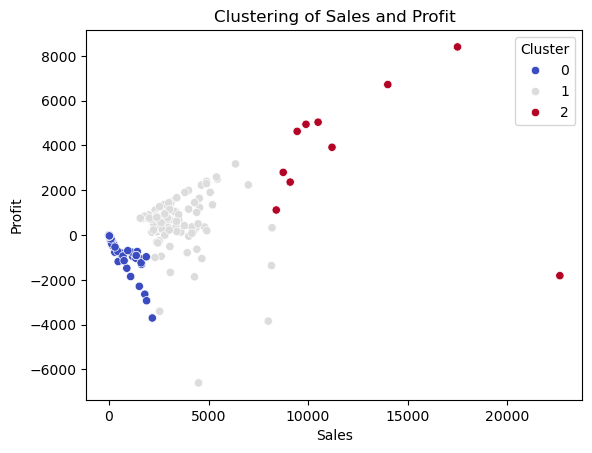

In [22]:
# Display clusters visually
sns.scatterplot(x="Sales", y="Profit", hue="Cluster", data=df_super_store, palette="coolwarm")  
plt.title("Clustering of Sales and Profit")
plt.show()

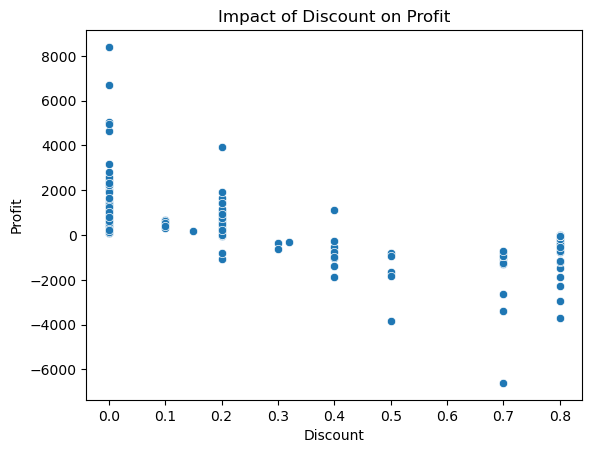

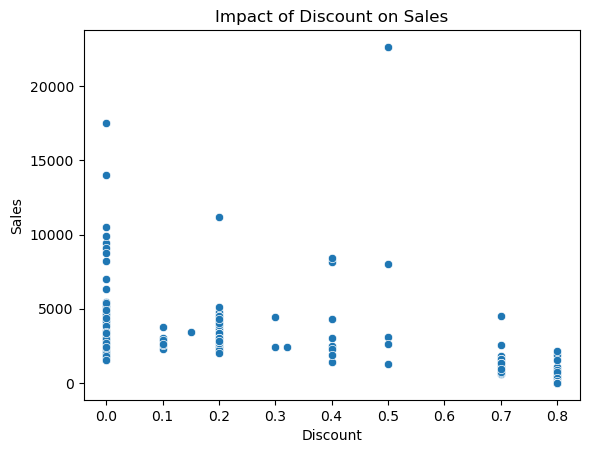

In [23]:
# Checking the Impact of Discount on Profit 

sns.scatterplot(x="Discount", y="Profit", data=df_super_store) 
plt.title("Impact of Discount on Profit")
plt.show()

# Checking the Impact of Discount on Sales
sns.scatterplot(x="Discount", y="Sales", data=df_super_store) 
plt.title("Impact of Discount on Sales")
plt.show()

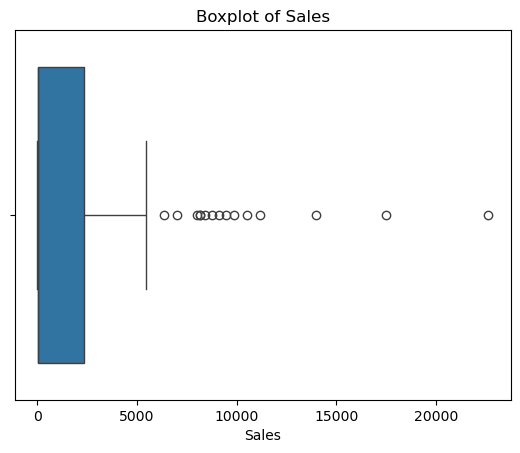

In [24]:
# Boxplot & Histogram for Sales Distribution
sns.boxplot(x=df_super_store["Sales"])  
plt.title("Boxplot of Sales")
plt.show()

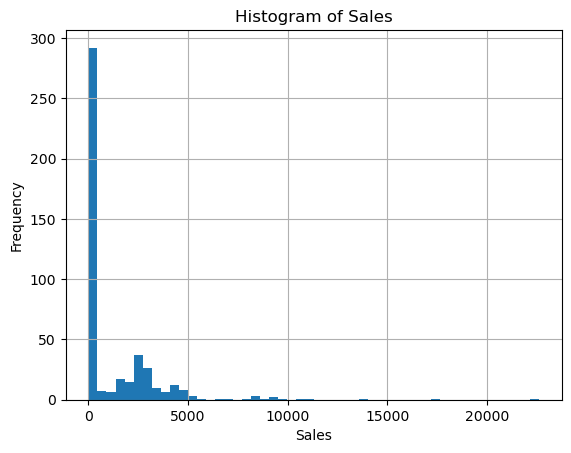

In [25]:
# Examining the distribution of sales with a histogram
df_super_store["Sales"].hist(bins=50)  
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Histogram of Sales")
plt.show()

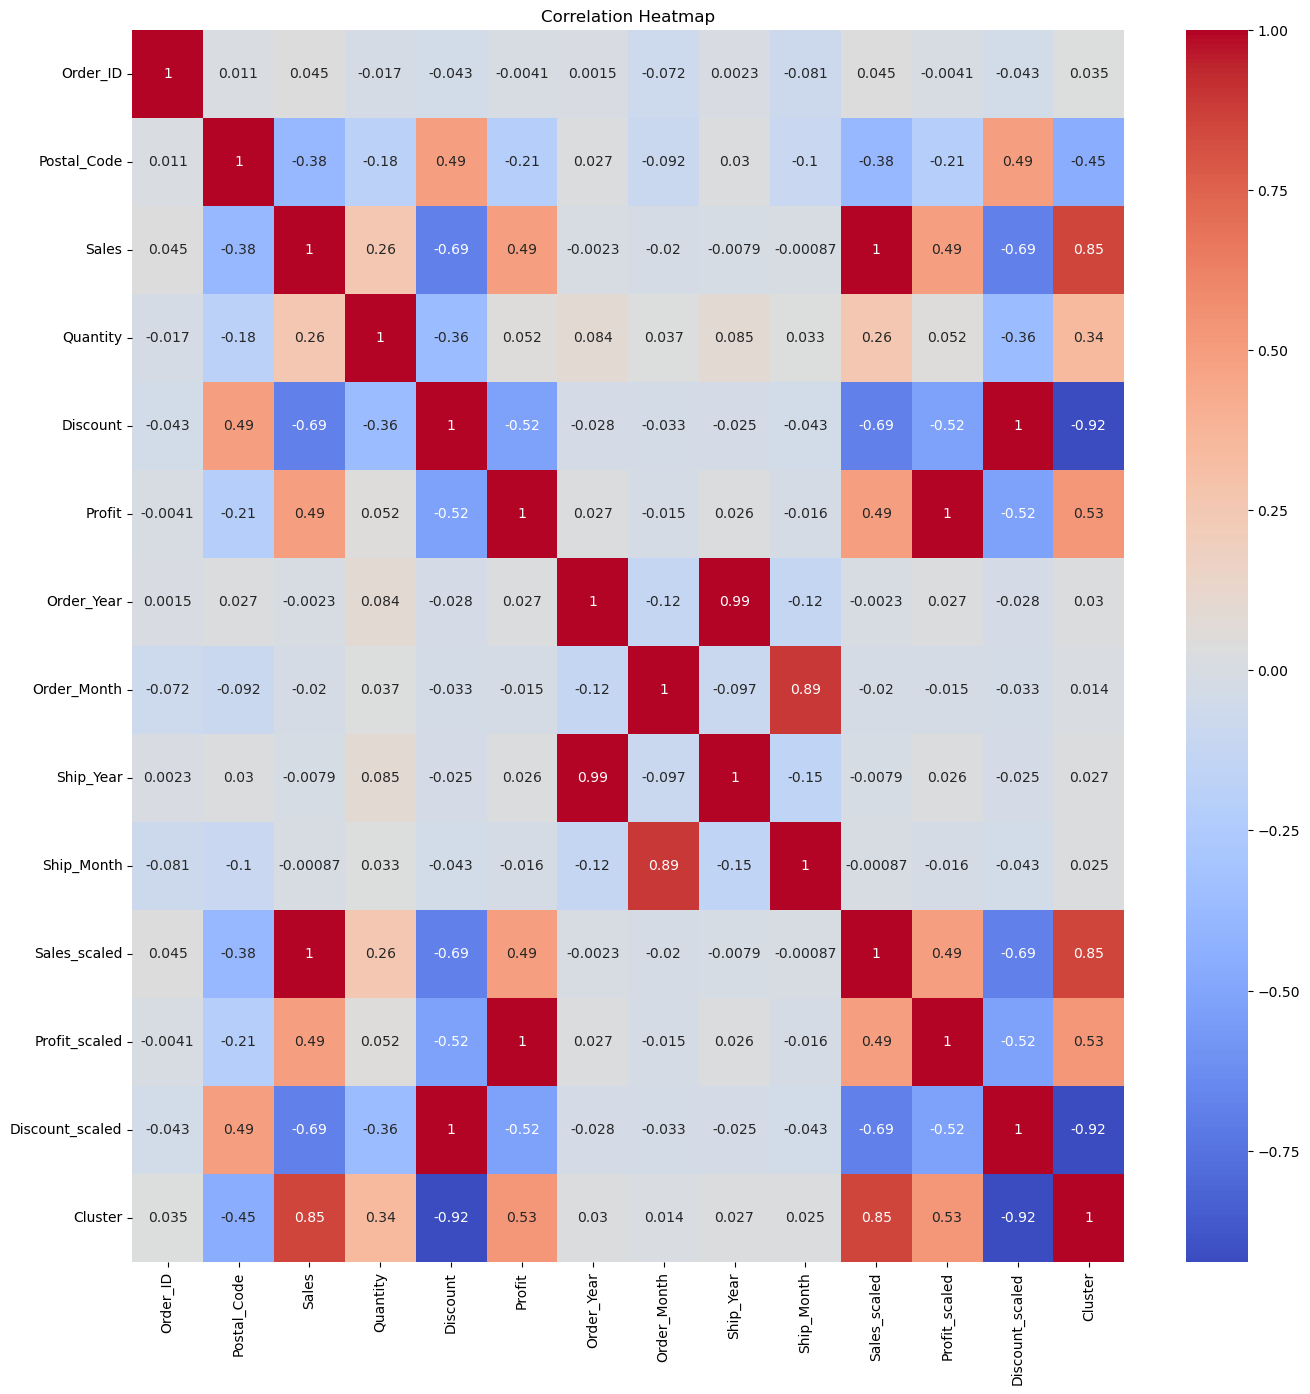

In [26]:
# Displaying Correlation Matrix
corr_matrix = df_super_store.select_dtypes(include=[np.number]).corr()  
plt.figure(figsize=(16,16))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm") 
plt.title("Correlation Heatmap")
plt.show()

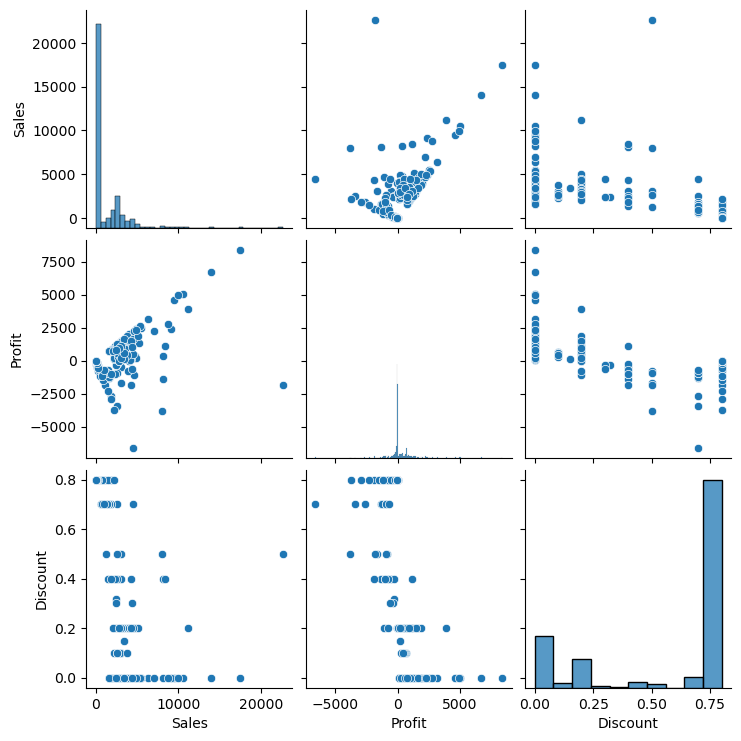

In [27]:
sns.pairplot(df_super_store[["Sales", "Profit", "Discount"]])
plt.show()

In [28]:
df_super_store.describe()

,Order_ID,Order_Date,Ship_Date,Postal_Code,Sales,Quantity,Discount,Profit,Order_Year,Order_Month,Ship_Year,Ship_Month,Sales_scaled,Profit_scaled,Discount_scaled,Cluster
count,455.000000,455,455,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,133897.984615,2016-04-20 16:55:54.725274624,2016-04-24 18:05:32.307692288,63436.613187,1261.649450,4.676923,0.585209,135.660465,2015.709890,7.654945,2015.729670,7.494505,1.655598,0.456795,2.078099,0.327473
min,100111.000000,2014-01-04 00:00:00,2014-01-08 00:00:00,2886.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000,2014.000000,1.000000,-0.368114,-28.297462,-0.756643,0.000000
25%,117072.000000,2015-04-06 00:00:00,2015-04-10 00:00:00,60522.500000,5.658000,3.000000,0.200000,-40.227200,2015.000000,5.000000,2015.000000,5.000000,-0.359748,-0.294064,0.212153,0.000000
50%,131618.000000,2016-06-06 00:00:00,2016-06-11 00:00:00,75150.000000,24.588000,4.000000,0.800000,-8.316000,2016.000000,8.000000,2016.000000,8.000000,-0.329373,-0.157836,3.118544,0.000000
75%,150777.000000,2017-05-18 00:00:00,2017-05-23 00:00:00,77095.000000,2318.008000,6.000000,0.800000,159.445000,2017.000000,11.000000,2017.000000,10.000000,3.350615,0.558331,3.118544,1.000000
max,169922.000000,2017-12-28 00:00:00,2018-01-01 00:00:00,98226.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000,2018.000000,12.000000,35.956549,35.736934,3.118544,2.000000
std,20631.306591,NaN,NaN,23077.866006,2361.284766,2.553182,0.325500,1027.212410,1.155055,3.296249,1.164593,3.344973,3.788883,4.385142,1.576716,0.514560


In [29]:
df_super_store.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer Name,Segment,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Order_Year,Order_Month,Ship_Year,Ship_Month,Sales_scaled,Profit_scaled,Discount_scaled,Sales_Range,Cluster
14,118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5,0.8,-123.8580,2015,11,2015,11,-0.258415,-0.651082,3.118544,51_100,0
15,118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544,3,0.8,-3.8160,2015,11,2015,11,-0.364745,-0.138626,3.118544,0_50,0
27,150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,Philadelphia,Pennsylvania,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522,2015,9,2015,9,4.578800,-7.230398,1.665349,NaN,1
75,118038,2017-12-09,2017-12-11,First Class,KB-16600,Ken Brennan,Corporate,Houston,Texas,77041,Central,OFF-BI-10004182,Office Supplies,Binders,Economy Binders,1.248,3,0.8,-1.9344,2017,12,2017,12,-0.366824,-0.130593,3.118544,0_50,0
101,158568,2016-08-29,2016-09-02,Standard Class,RB-19465,Rick Bensley,Home Office,Chicago,Illinois,60610,Central,OFF-BI-10002609,Office Supplies,Binders,Avery Hidden Tab Dividers for Binding Systems,1.788,3,0.8,-3.0396,2016,8,2016,9,-0.365958,-0.135311,3.118544,0_50,0


# sort column

In [30]:
df_super_store.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal_Code', 'Region',
       'Product_ID', 'Category', 'Sub_Category', 'Product_Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Order_Year', 'Order_Month',
       'Ship_Year', 'Ship_Month', 'Sales_scaled', 'Profit_scaled',
       'Discount_scaled', 'Sales_Range', 'Cluster'],
      dtype='object')

In [31]:
sorted_column = [
    # time
    'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',

    # customer
    'Customer_ID', 'Segment',

    # geograpghic
    'Region', 'State', 'City', 'Postal_Code',

    # product
    'Product_ID', 'Category', 'Sub_Category', 'Product_Name',

    # scaled
    'Discount_scaled', 'Profit_scaled', 'Sales_scaled',

    # sales
    'Sales', 'Quantity', 'Discount', 'Profit', 'Sales_Range'
]

df_super_store = df_super_store[sorted_column]
del sorted_column

# save dataset

In [32]:
with open("database_exports/clean.sql", "w", encoding='utf-8') as f:
    
    f.write(f"CREATE DATABASE IF NOT EXISTS `{database}`;\n")
    f.write(f"USE `{database}`;\n\n")
    f.write("DROP TABLE IF EXISTS `Superstore`;\n")

    table_creation_sql = pd.io.sql.get_schema(df_super_store, 'Superstore', con=engine)
    f.write(table_creation_sql + ";\n\n")
    
    # insert item 
    for index, row in df_super_store.iterrows():
        values = ", ".join([f"'{str(value).replace("'", "''")}'" if pd.notna(value) else 'NULL' 
                          for value in row.values])
        f.write(f"INSERT INTO `Superstore` VALUES ({values});\n")


In [33]:
# save csv file
df_super_store.to_csv('database_exports/Superstore.csv')

# machin learning dataset

In [34]:
df_machine_learning = df_super_store.copy()

# encoding

In [35]:
label_encode = LabelEncoder()

df_machine_learning["Ship_Mode"] = label_encode.fit_transform(df_machine_learning["Ship_Mode"])
df_machine_learning["Region"] = label_encode.fit_transform(df_machine_learning["Region"])
df_machine_learning["State"] = label_encode.fit_transform(df_machine_learning["State"])
df_machine_learning["Sub_Category"] = label_encode.fit_transform(df_machine_learning["Sub_Category"])
df_machine_learning["City"] = label_encode.fit_transform(df_machine_learning["City"])
df_machine_learning["Category"] = label_encode.fit_transform(df_machine_learning["Category"])

del label_encode

In [36]:
df_machine_learning.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,Region,State,City,Postal_Code,Product_ID,Category,Sub_Category,Product_Name,Discount_scaled,Profit_scaled,Sales_scaled,Sales,Quantity,Discount,Profit,Sales_Range
14,118983,2015-11-22,2015-11-26,3,HP-14815,Home Office,0,27,39,76106,OFF-AP-10002311,1,1,Holmes Replacement Filter for HEPA Air Cleaner...,3.118544,-0.651082,-0.258415,68.810,5,0.8,-123.8580,51_100
15,118983,2015-11-22,2015-11-26,3,HP-14815,Home Office,0,27,39,76106,OFF-BI-10000756,1,2,Storex DuraTech Recycled Plastic Frosted Binders,3.118544,-0.138626,-0.364745,2.544,3,0.8,-3.8160,0_50
27,150630,2015-09-17,2015-09-21,3,TB-21520,Consumer,1,24,92,19140,FUR-BO-10004834,0,3,"Riverside Palais Royal Lawyers Bookcase, Royal...",1.665349,-7.230398,4.578800,3083.430,7,0.5,-1665.0522,NaN
75,118038,2017-12-09,2017-12-11,0,KB-16600,Corporate,0,27,49,77041,OFF-BI-10004182,1,2,Economy Binders,3.118544,-0.130593,-0.366824,1.248,3,0.8,-1.9344,0_50
101,158568,2016-08-29,2016-09-02,3,RB-19465,Home Office,0,8,20,60610,OFF-BI-10002609,1,2,Avery Hidden Tab Dividers for Binding Systems,3.118544,-0.135311,-0.365958,1.788,3,0.8,-3.0396,0_50


# save dateset for machine learning

In [37]:
with open("database_exports/machine_learning_dataset.sql", "w", encoding='utf-8') as f:
    
    f.write(f"CREATE DATABASE IF NOT EXISTS `{database}`;\n")
    f.write(f"USE `{database}`;\n\n")
    f.write("DROP TABLE IF EXISTS `Superstore`;\n")

    table_creation_sql = pd.io.sql.get_schema(df_machine_learning, 'Superstore', con=engine)
    f.write(table_creation_sql + ";\n\n")
    
    # insert item 
    for index, row in df_machine_learning.iterrows():
        values = ", ".join([f"'{str(value).replace("'", "''")}'" if pd.notna(value) else 'NULL' 
                          for value in row.values])
        f.write(f"INSERT INTO `Superstore` VALUES ({values});\n")

engine.dispose()